In [11]:
import importlib
import sys
import os
import time

import torch
from PIL import Image 
import matplotlib.pyplot as plt 
import numpy as np
from tqdm import tqdm

In [2]:
import face_detection

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


In [3]:
importlib.reload(face_detection)

face_detector = face_detection.FaceXLib()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [28]:
import random

img_root = '/home/phucle/code/data/clean_data/'

img_files = sorted(os.listdir(img_root))
img_files = [file for file in img_files if (
    file.lower().endswith(".jpeg") or file.lower().endswith(".jpg") or file.lower().endswith(".png")
)]
random.shuffle(img_files)

img_files = img_files[:]

[0.932145]


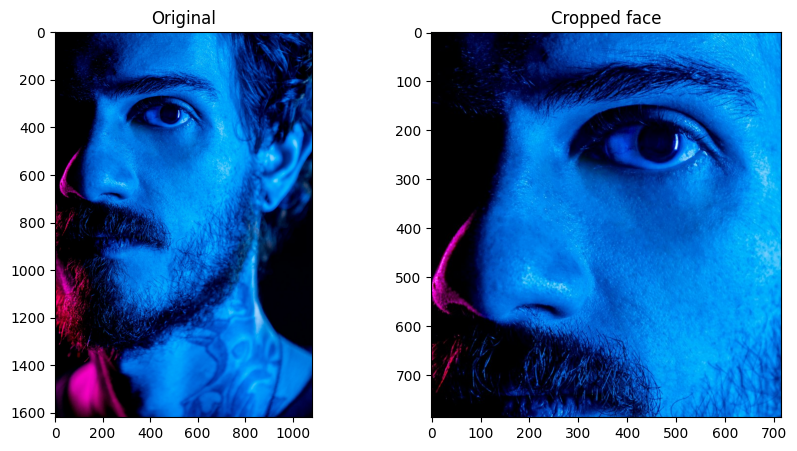

[0.9997757]


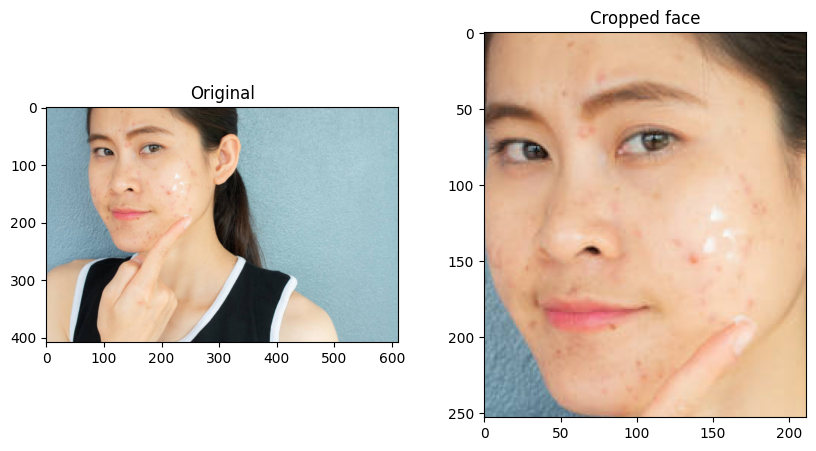

[]
No face detected in /home/phucle/code/data/clean_data/dermnet_warts-molluscum-and-other-viral-infections_herpes-type-1-recurrent-62.jpg


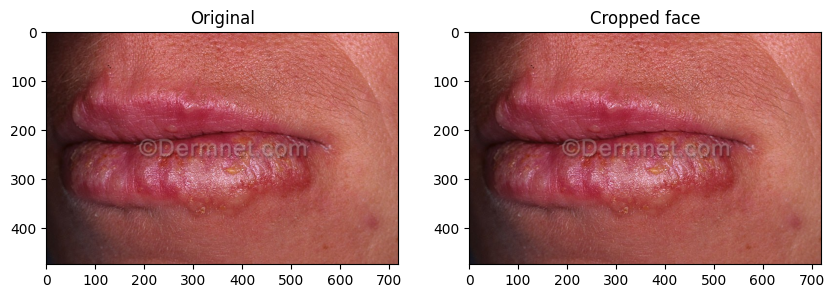

[0.9999796]


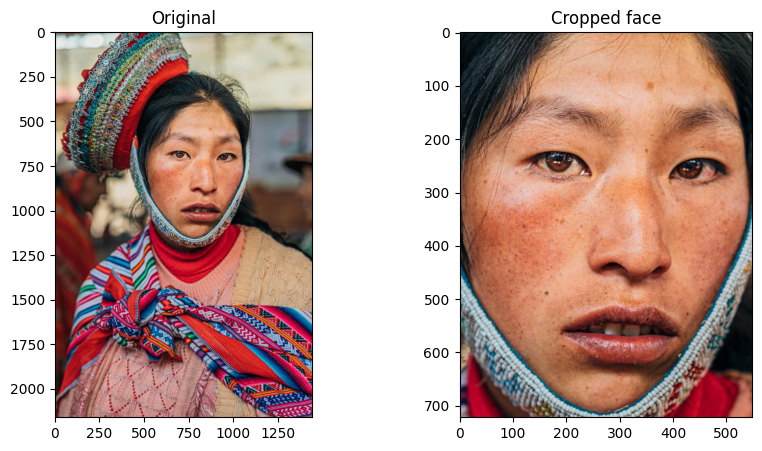

[0.99709916]


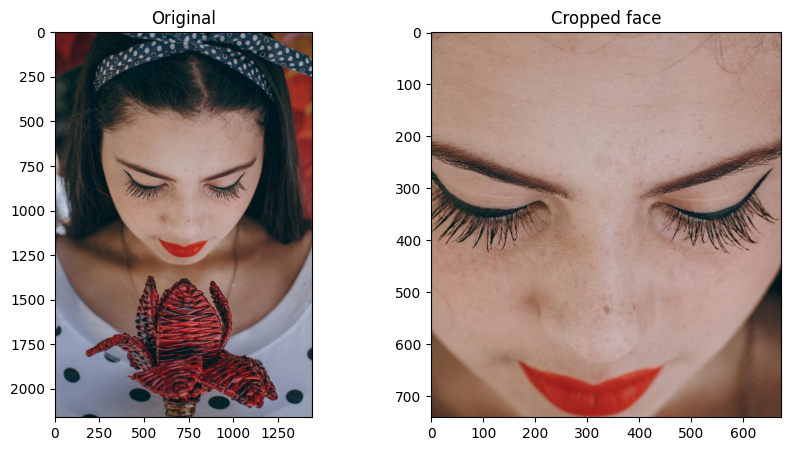

In [8]:

# img_files = ['pexels-photo-6338381.jpeg']
for file in (img_files):
    img_path = os.path.join(img_root, file)
    img = Image.open(img_path).convert('RGB')
    w, h = img.size
    img = np.array(img)

    faces_bboxes, scores = face_detector(img_path)
    # face_detector.visualize(faces_bbox, img_path)
    # print(faces_bbox)
    print(scores)
    if len(faces_bboxes) == 0:
        print(f'No face detected in {img_path}')

    else:
        # Crop the face from image
        x1, y1, x2, y2 = faces_bboxes[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        x1, y1 = max(0, x1), max(0, y1) # to prevent negative index
        if scores[0] > 0.7:
            img = img[y1:y2, x1:x2]
        else:
            print(f'Not enough confidence for face in {img_path}. Ignored.')
            
    plt.figure(figsize=(10, 5))
    plt.subplot(121); plt.imshow(Image.open(img_path).convert('RGB')); plt.title('Original')
    plt.subplot(122); plt.imshow(img); plt.title('Cropped face')
    plt.show()
